## Software Technology Capstone [Assignment 9] - u3242880

DATA SET: Diamond Data available from Kaggle repository
https://www.kaggle.com/code/karnikakapoor/diamond-price-prediction/notebook


In [4]:
%cd /content/drive/MyDrive/SoftwareTechCapstone

/content/drive/MyDrive/SoftwareTechCapstone


In [5]:
!ls /content/drive/MyDrive/SoftwareTechCapstone

DataForML.pkl  diamonds.csv  Final_SVM_Model.pk1


**1. Reading the Dataset**

In [6]:
#supress warning messages
import warnings
warnings.filterwarnings("ignore")

In [7]:
#import libaries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#read dataset
DiamondData=pd.read_csv('/content/drive/MyDrive/SoftwareTechCapstone/diamonds.csv', encoding="latin")

#removing duplicates if any
print("Shape before deleting duplicate values:", DiamondData.shape)
DiamondData=DiamondData.drop_duplicates()
print("Shape after deleting duplicate values", DiamondData.shape)


Shape before deleting duplicate values: (53940, 11)
Shape after deleting duplicate values (53940, 11)


- 53,940 unqiue diamonds
- 10 diamond attributes
- cut, color and clarity are qualitative, the rest are quantitative

---



**2. Problem Statement Definition**: Develop a prediction model which can predict the price of a diamond (in USD) based on the following predictive attributes:
* carat (0.2-5.01) - physical weight of diamond measured in metric carats
* cut (fair, good, very good, premium, ideal)
* color (J (worst) - D (best) - quality of cut
* clarity (I1(worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best)) - how clear the diamond is
* depth = z/mean(x,y)
* table - width of top of diamond relative to widest point
* x dimension - length in mm
* y dimension - width in mm
* z dimension - depth in mm


**3. Target Variable**: diamond price in USD

**4. Target Variable Distribution**

<Axes: >

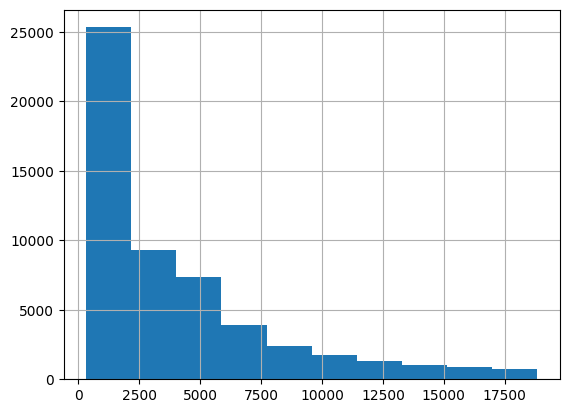

In [8]:
%matplotlib inline
DiamondData['price'].hist()

Positively skewed price distribution. This aligns with the expectation that of more valuable diamonds are increasingly more rare.

For cheaper diamonds there is a large data sample for the machine learning algorithm to learn from however as the amount of diamonds worth more steadily decrease with price, the algorithms predicition of more expensive diamonds may be less reliable. Even so however there seems to be adequate amounts of data in each column.

**5. Basic Data Exploratory Analysis**

In [9]:
print("First five diamonds in the dataset")
DiamondData.head()

First five diamonds in the dataset


,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [10]:
print("Last five diamonds in the dataset")
DiamondData.tail()

Last five diamonds in the dataset


,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
53935,53936,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,53937,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,53938,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,53939,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74
53939,53940,0.75,Ideal,D,SI2,62.2,55.0,2757,5.83,5.87,3.64


In [11]:
DiamondData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


In [12]:
DiamondData.describe(include='all')
# NaN: not a number

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940,53940,53940,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
unique,NaN,NaN,5,7,8,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Ideal,G,SI1,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,21551,11292,13065,NaN,NaN,NaN,NaN,NaN,NaN
mean,26970.500000,0.797940,NaN,NaN,NaN,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,15571.281097,0.474011,NaN,NaN,NaN,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,1.000000,0.200000,NaN,NaN,NaN,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,13485.750000,0.400000,NaN,NaN,NaN,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,26970.500000,0.700000,NaN,NaN,NaN,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,40455.250000,1.040000,NaN,NaN,NaN,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000


In [13]:
# < 20 unique indicate variable is categorical
DiamondData.nunique()

Unnamed: 0    53940
carat           273
cut               5
color             7
clarity           8
depth           184
table           127
price         11602
x               554
y               552
z               375
dtype: int64

**Observations from Step 5**
*   cut, color and clarity are categorical while the rest are continuous
*   min values of the x, y and z columns is 0 indicating presence of faulty data as the dimensions of a real life diamond cannot be zero
* 'Unamed: 0' column does not affect target variable
* all other columns selected for further analysis



**6. Identifying and Rejecting Unwanted Columns**

In [14]:
# remove Unnamed: 0 column
DiamondData = DiamondData.drop(["Unnamed: 0"], axis =1)
DiamondData.describe(include='all')

,carat,cut,color,clarity,depth,table,price,x,y,z
count,53940.000000,53940,53940,53940,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
unique,NaN,5,7,8,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Ideal,G,SI1,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,21551,11292,13065,NaN,NaN,NaN,NaN,NaN,NaN
mean,0.797940,NaN,NaN,NaN,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,NaN,NaN,NaN,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,NaN,NaN,NaN,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,NaN,NaN,NaN,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,NaN,NaN,NaN,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,NaN,NaN,NaN,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000


**7. Visual Exploratory Data Analysis**

**Categorical Predictor Variables in Histograms**

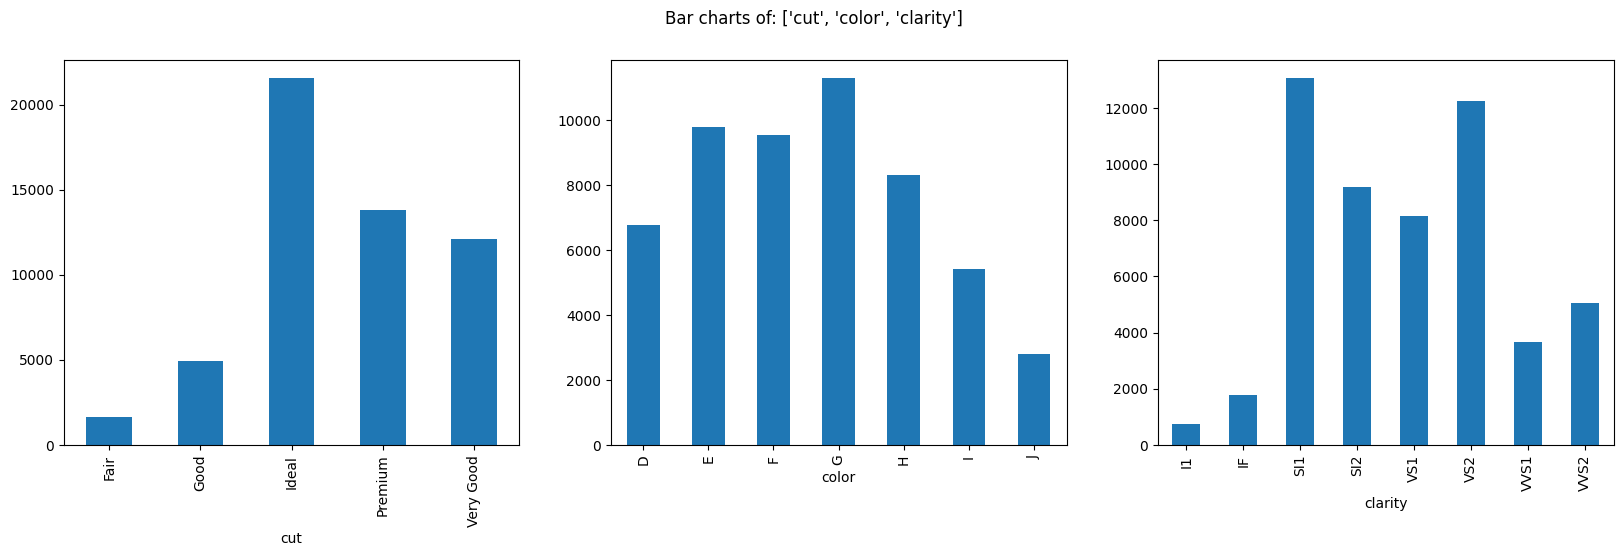

In [15]:
def PlotBarCharts(inpData, colsToPlot):
  %matplotlib inline

  import matplotlib.pyplot as plt
  fig, subplot=plt.subplots(nrows=1, ncols=len(colsToPlot), figsize=(20,5))
  fig.suptitle('Bar charts of: '+str(colsToPlot))

  for colName, plotNumber in zip(colsToPlot, range(len(colsToPlot))):
    inpData.groupby(colName).size().plot(kind='bar', ax=subplot[plotNumber])

PlotBarCharts(inpData=DiamondData, colsToPlot=['cut', 'color', 'clarity'])

**Continuous Predictor Variables in Histograms**




array([[<Axes: title={'center': 'carat'}>,
        <Axes: title={'center': 'depth'}>],
       [<Axes: title={'center': 'table'}>, <Axes: title={'center': 'x'}>],
       [<Axes: title={'center': 'y'}>, <Axes: title={'center': 'z'}>]],
      dtype=object)

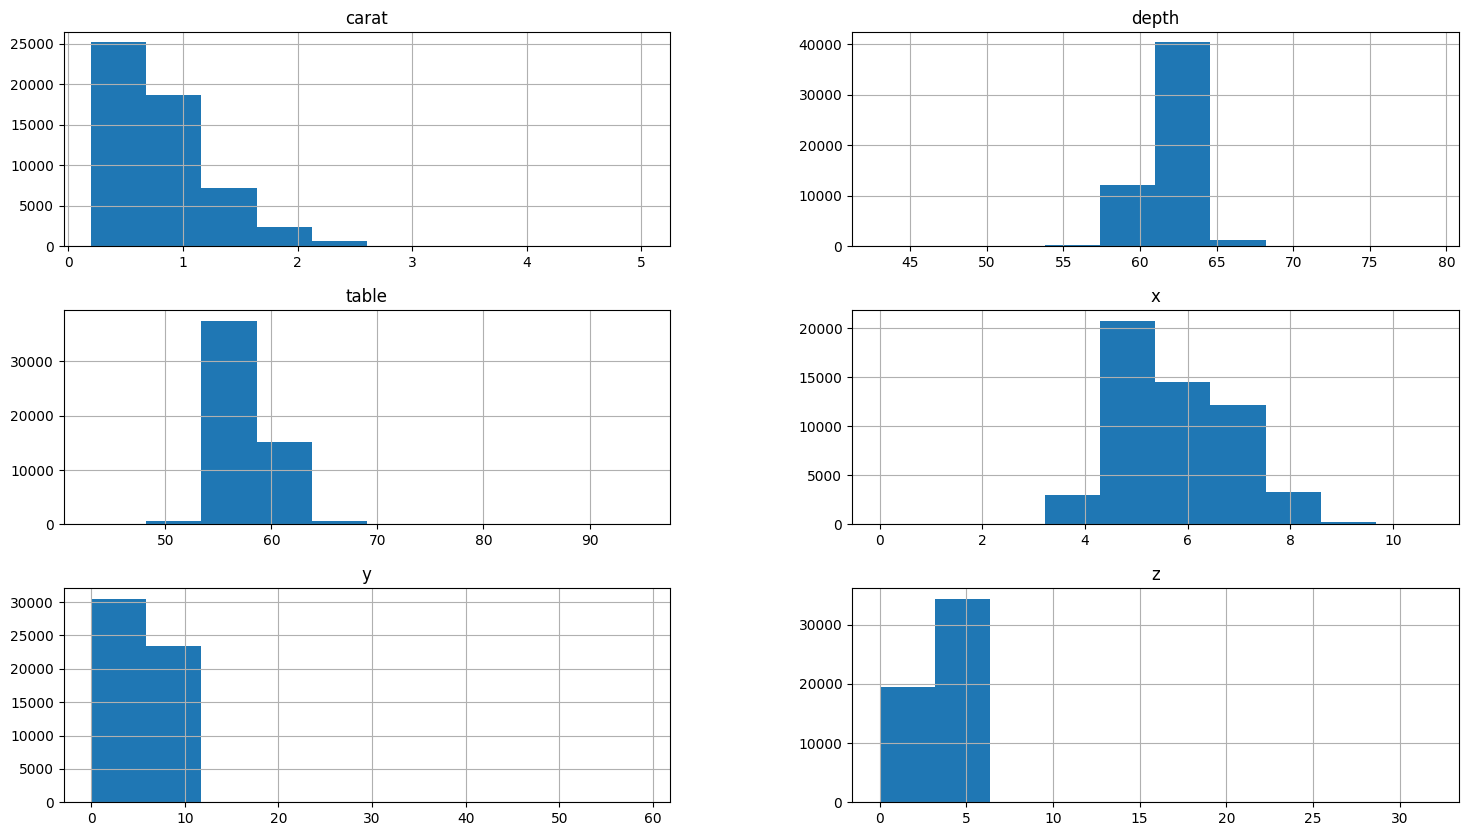

In [16]:
DiamondData.hist(['carat','depth','table','x','y','z'], figsize=(18,10))

**8. Feature Selection based on Data Distribution**

Selected continuous variables:
* carat
* depth  
* table
* x dimension
* y dimension
* z dimension

**9. Outlier and Missing Value Removal**

No outliers to be treated

In [17]:
# remove faulty data in x, y, z
DiamondData = DiamondData.drop(DiamondData[DiamondData["x"]==0] .index)
DiamondData = DiamondData.drop(DiamondData[DiamondData["y"]==0] .index)
DiamondData = DiamondData.drop(DiamondData[DiamondData["z"]==0] .index)

print("New shape after faulty data removal: " + str(DiamondData.shape))

print("\n"+"Updated Data:")
DiamondData.describe(include='all')

New shape after faulty data removal: (53920, 10)

Updated Data:


,carat,cut,color,clarity,depth,table,price,x,y,z
count,53920.000000,53920,53920,53920,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000
unique,NaN,5,7,8,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Ideal,G,SI1,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,21548,11284,13063,NaN,NaN,NaN,NaN,NaN,NaN
mean,0.797698,NaN,NaN,NaN,61.749514,57.456834,3930.993231,5.731627,5.734887,3.540046
std,0.473795,NaN,NaN,NaN,1.432331,2.234064,3987.280446,1.119423,1.140126,0.702530
min,0.200000,NaN,NaN,NaN,43.000000,43.000000,326.000000,3.730000,3.680000,1.070000
25%,0.400000,NaN,NaN,NaN,61.000000,56.000000,949.000000,4.710000,4.720000,2.910000
50%,0.700000,NaN,NaN,NaN,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,NaN,NaN,NaN,62.500000,59.000000,5323.250000,6.540000,6.540000,4.040000


Now the min values of x, y, z are consistent with real diamond data.

In [18]:
# how many missing values in each column
DiamondData.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

**10. Visual and Statistic Correlation analysis for selection of best features**

**Continuous vs Continuous [Scatter Chart]**

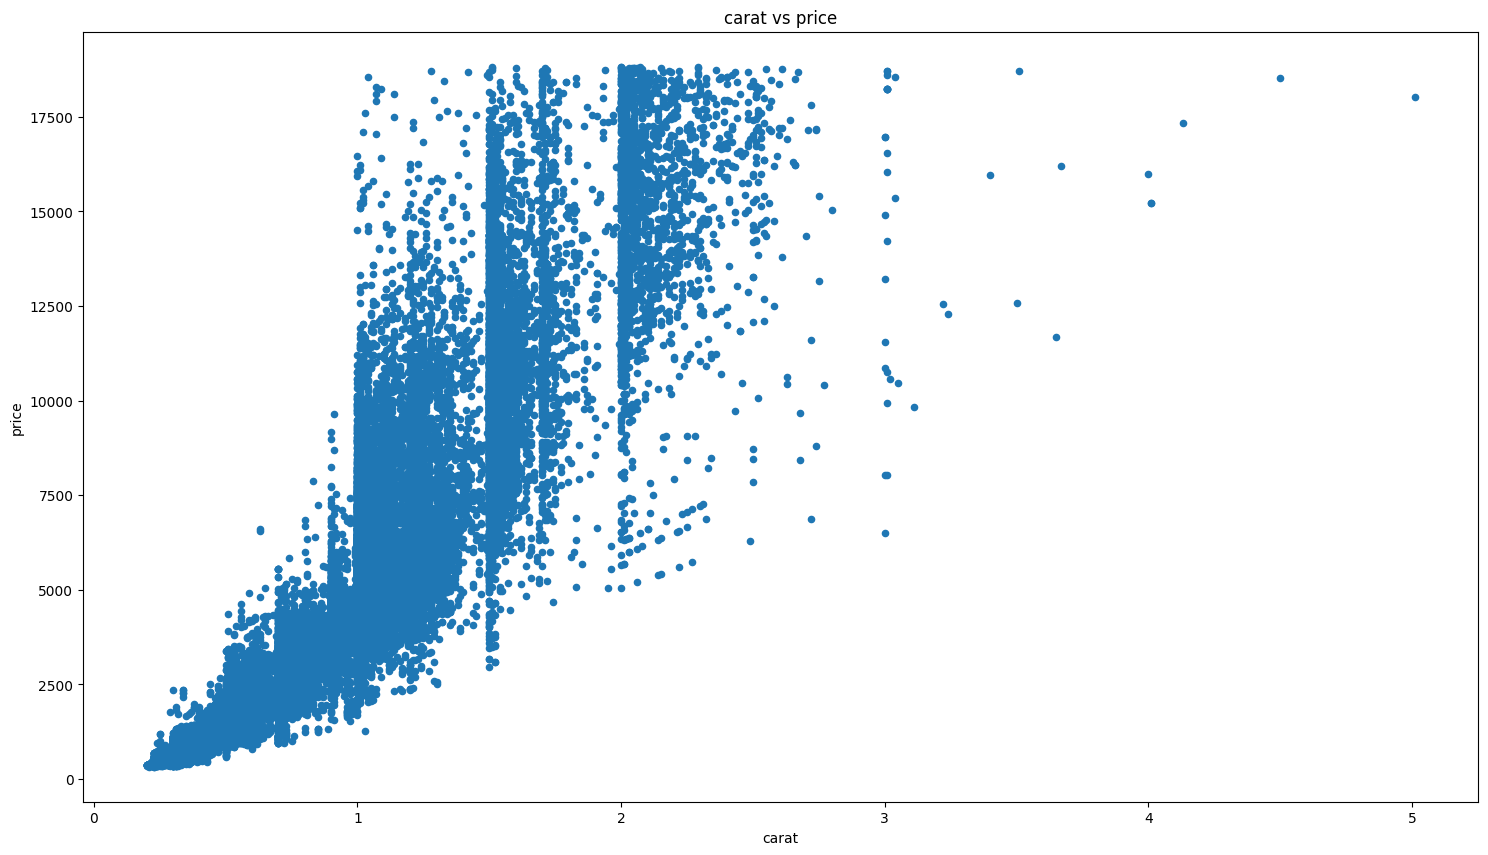

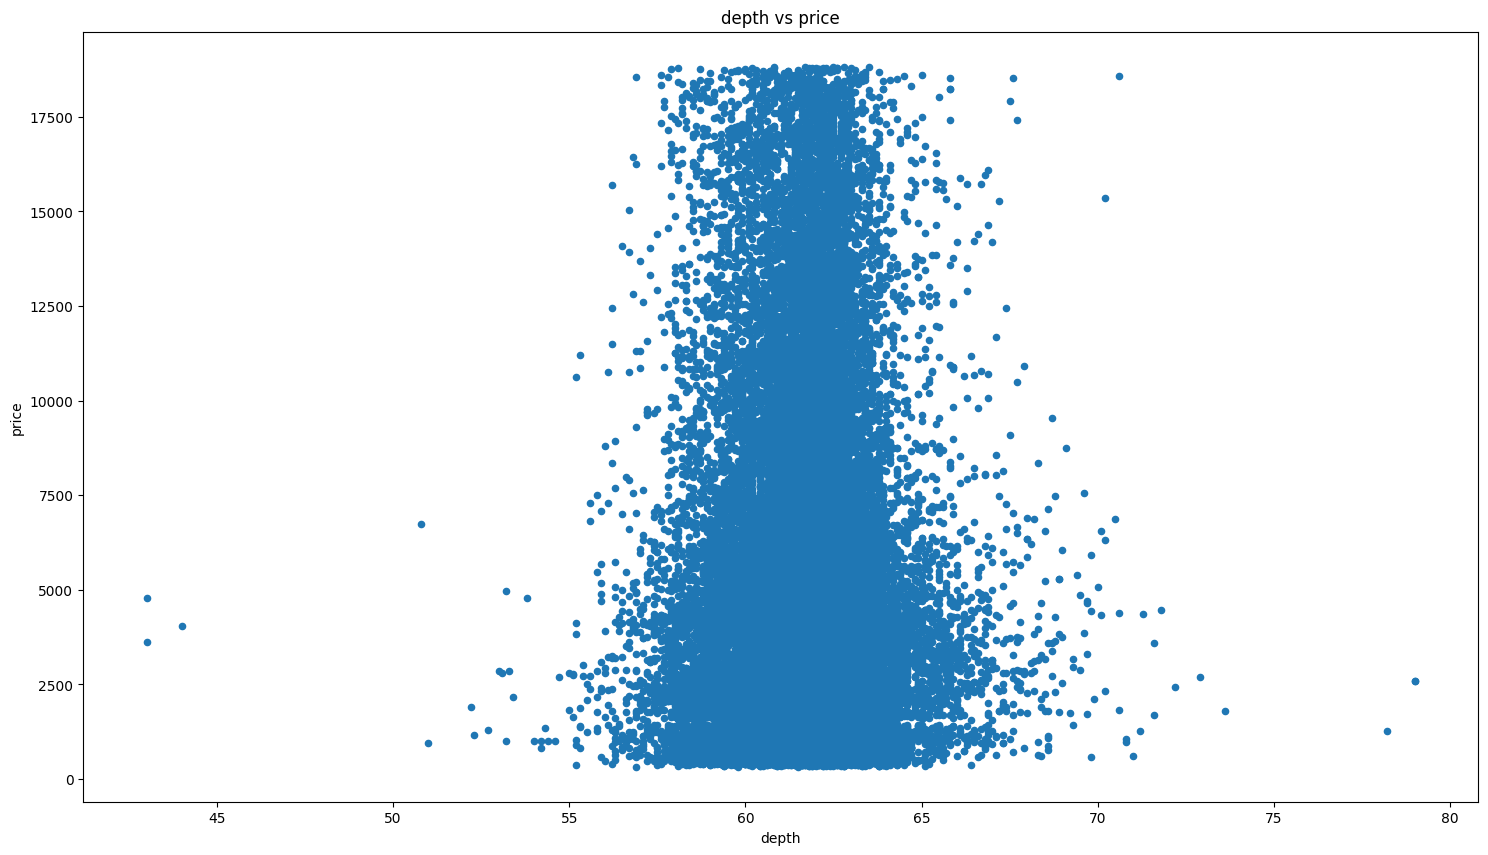

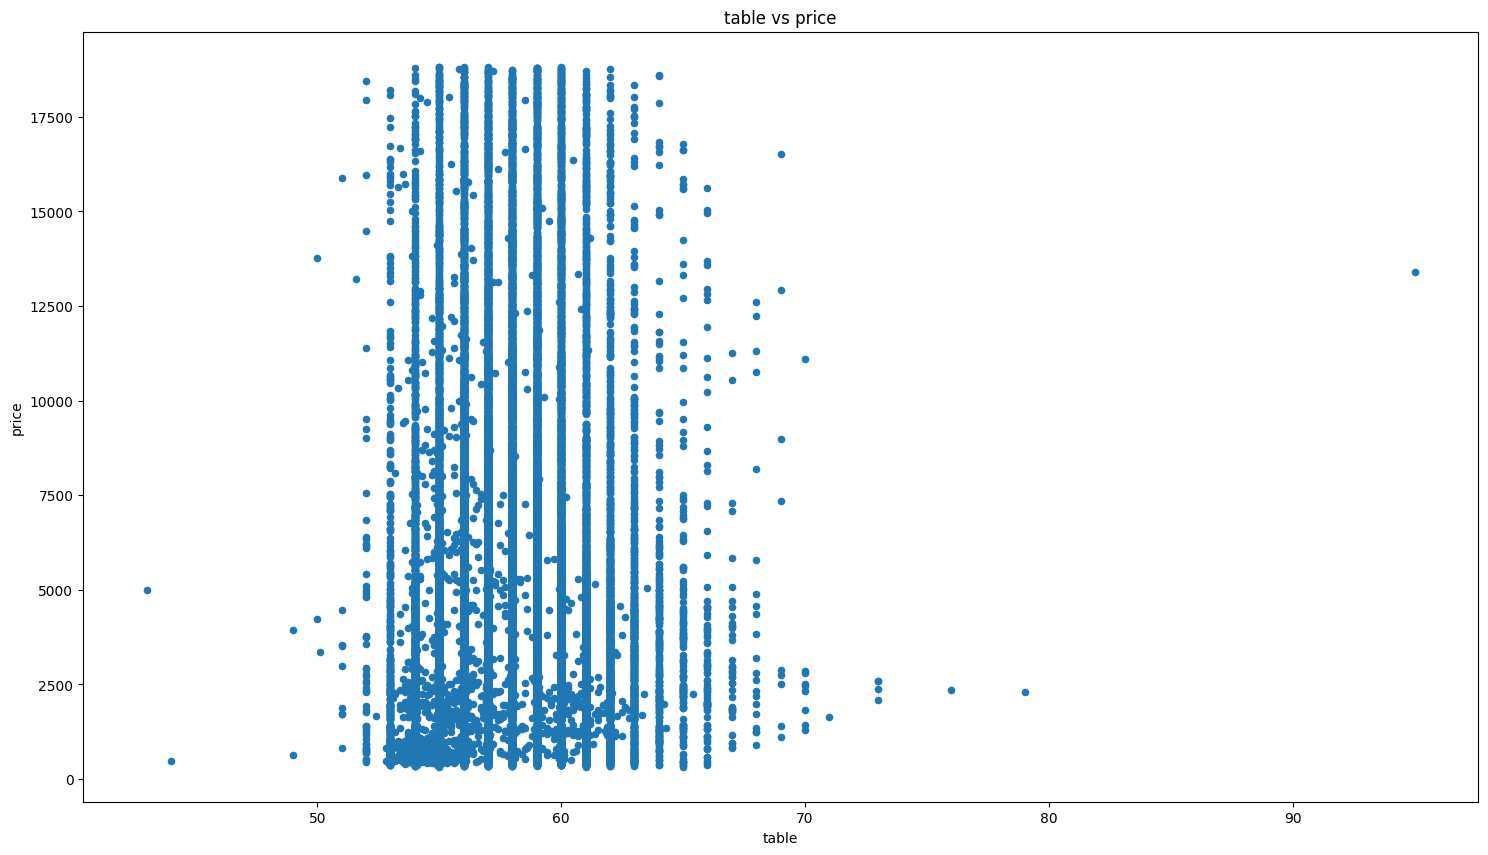

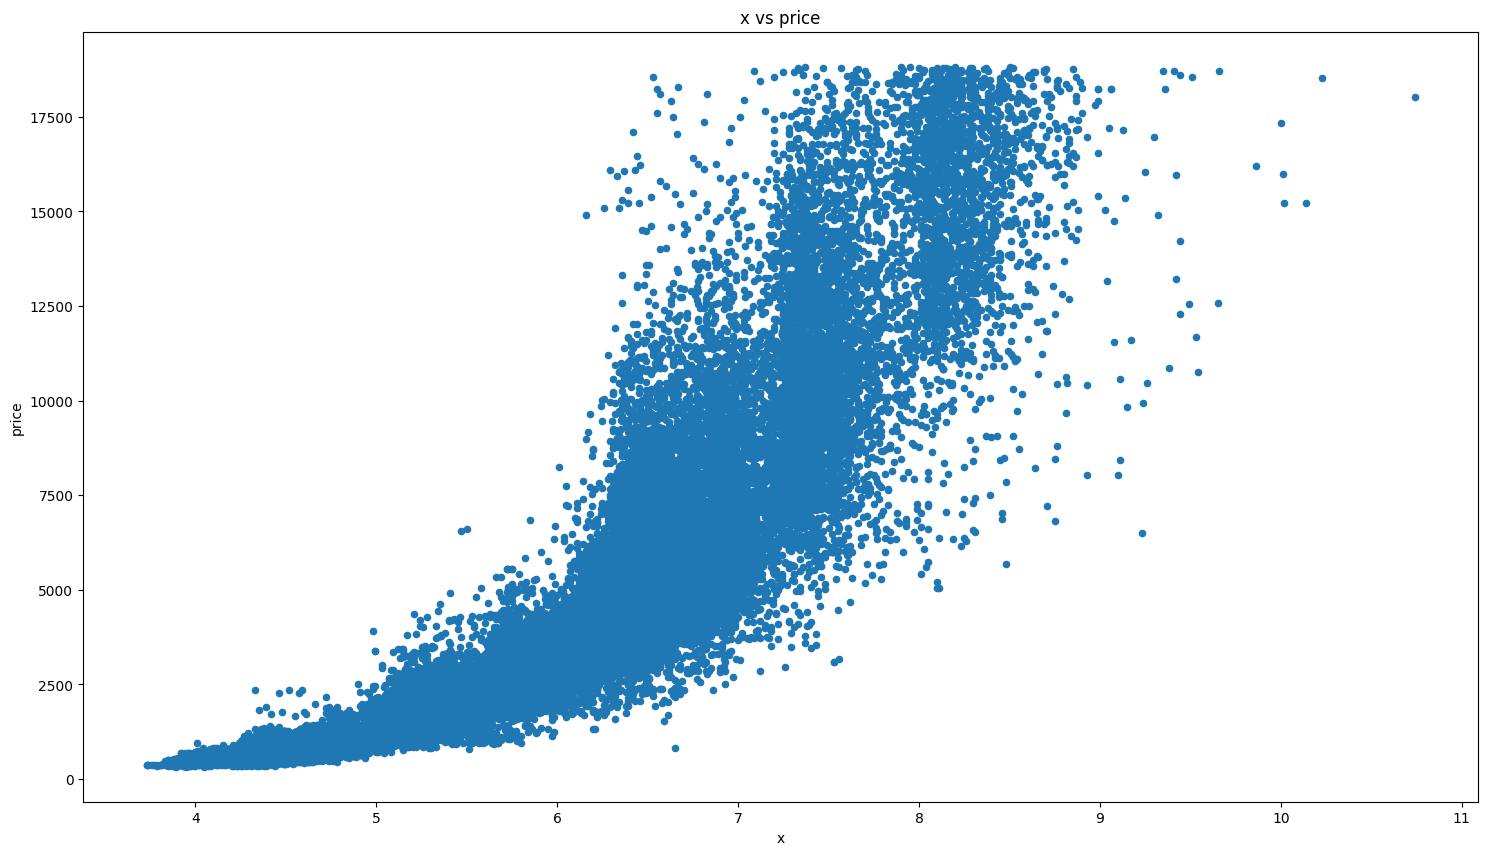

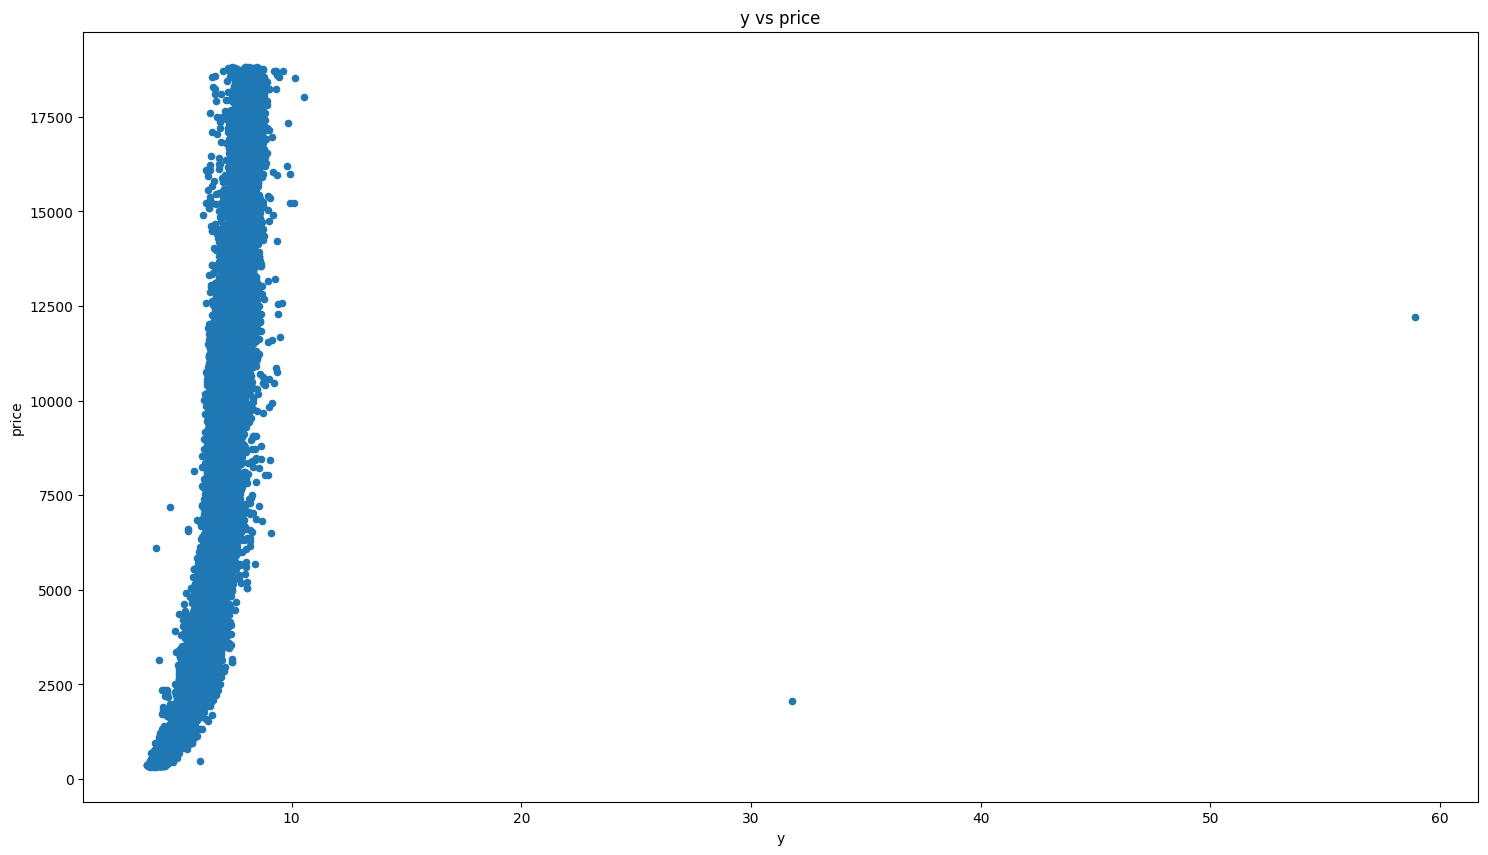

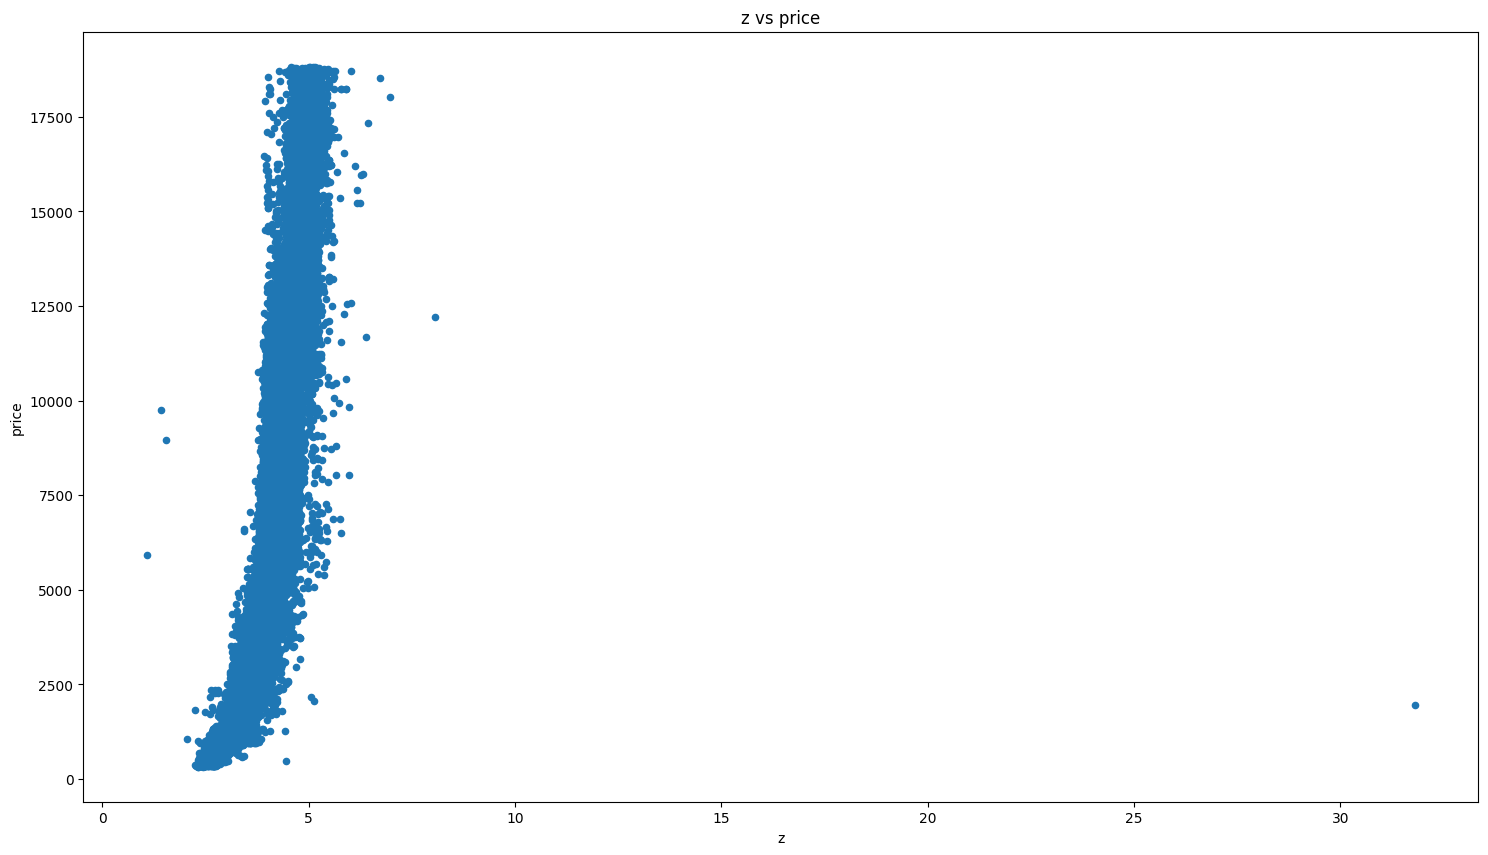

In [19]:
ContinuousCols=['carat', 'depth', 'table', 'x', 'y', 'z']
for predictor in ContinuousCols:
  DiamondData.plot.scatter(x=predictor, y='price', figsize=(18,10), title=predictor+" vs "+ 'price')


Directly proportional (increasing trend) to price: carats and x dimension

y and z also show an increasing trend however less prominent.

Depth and table scatter plots show no clear trend. Therefore elimated.

**Statistical feature selection (Continuous vs Continuous) - Pearson's Correlation Coefficient**

In [20]:
ContinuousCols=['price', 'carat', 'depth', 'table', 'x', 'y', 'z']
CorrelationData=DiamondData[ContinuousCols].corr()
CorrelationData

,price,carat,depth,table,x,y,z
price,1.000000,0.921592,-0.010729,0.127245,0.887231,0.867864,0.868206
carat,0.921592,1.000000,0.028259,0.181646,0.977779,0.953991,0.961048
depth,-0.010729,0.028259,1.000000,-0.295733,-0.025017,-0.029069,0.095023
table,0.127245,0.181646,-0.295733,1.000000,0.196097,0.184493,0.152483
x,0.887231,0.977779,-0.025017,0.196097,1.000000,0.974918,0.975435
y,0.867864,0.953991,-0.029069,0.184493,0.974918,1.000000,0.956744
z,0.868206,0.961048,0.095023,0.152483,0.975435,0.956744,1.000000


In [21]:
# if correlation value >0.5: indicate strong relationship
CorrelationData['price'][abs(CorrelationData['price']) > 0.5]

price    1.000000
carat    0.921592
x        0.887231
y        0.867864
z        0.868206
Name: price, dtype: float64

FINAL SELECTED continuous:
* carat
* x
* y
* z



**Categorical vs Continuous [Box Plots]**

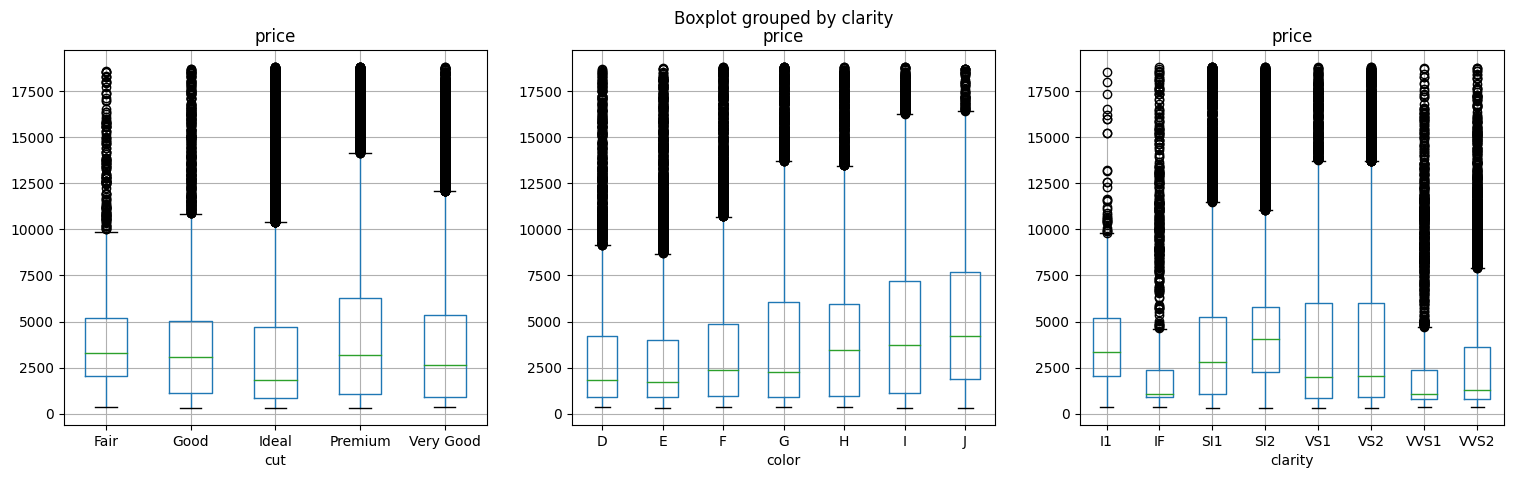

In [22]:
CategoricalCols=["cut", "color", "clarity"]

fig, PlotCanvas=plt.subplots(nrows=1, ncols=len(CategoricalCols), figsize=(18,5))

for PredictorCol, i in zip (CategoricalCols, range(len(CategoricalCols))):
  DiamondData.boxplot(column="price", by=PredictorCol, figsize=(5,5), vert=True, ax=PlotCanvas[i])


Variations in box distribution for each column indicating correlation to target variable.

**Statistical feature selection (Categorical vs Continuous) - ANOVA test**


In [23]:
def Anova(inpData, TargetVariable, CategoricalCols):
  from scipy.stats import f_oneway

  SelectedCategorical=[]

  print("##### ANOVA Results ##### \n")
  for predictor in CategoricalCols:
    CategoricalGroupList = inpData.groupby(predictor)[TargetVariable].apply(list)
    AnovaResults = f_oneway(*CategoricalGroupList)

  if (AnovaResults[1] < 0.05):
    print(predictor,"is correlated with", TargetVariable, '| P-Value:', AnovaResults[1])
    SelectedCategorical.append(predictor)
  else:
    print(predictor, "is NOT correlated with", TargetVariable, '| P-Value:', AnovaResults[1])

  return(SelectedCategorical)


In [24]:
CategoricalCols=['cut', 'color', 'clarity']
Anova(inpData=DiamondData, TargetVariable='price', CategoricalCols=CategoricalCols)


##### ANOVA Results ##### 

clarity is correlated with price | P-Value: 2.4057202e-316


['clarity']

According to ANOVA only clarity is correlated with Target Variable
FINAL SELECTED Cateogrical:
* clarity

In [25]:
# final selection of columns to be used in ML model
SelectedColumns = ['carat', 'x', 'y', 'z', 'clarity']
DataForML=DiamondData[SelectedColumns]
DataForML.head()

,carat,x,y,z,clarity
0,0.23,3.95,3.98,2.43,SI2
1,0.21,3.89,3.84,2.31,SI1
2,0.23,4.05,4.07,2.31,VS1
3,0.29,4.20,4.23,2.63,VS2
4,0.31,4.34,4.35,2.75,SI2


**11. Data Conversion to numeric values for machine learning/predictive analysis**

Of selected columns clarity (ordinal categorical) requires numeric conversion  

In [26]:
DataForML['clarity'].replace(["I1", "SI2", "SI1", "VS2", "VS1", "VVS2", "VVS1", "IF"],
                               [1, 2, 3, 4, 5, 6, 7, 8], inplace=True)
DataForML.head()

,carat,x,y,z,clarity
0,0.23,3.95,3.98,2.43,2
1,0.21,3.89,3.84,2.31,3
2,0.23,4.05,4.07,2.31,5
3,0.29,4.20,4.23,2.63,4
4,0.31,4.34,4.35,2.75,2


In [27]:
# Saving final data subset for reference during deployment
DataForML.to_pickle('DataForML.pkl')

**12. Training/Testing Sampling and K-fold Cross Validation**

Split 70% of the data for training and 30% for testing.

In [28]:
# Adding target var to data
DataForML['price']=DiamondData['price']
print (DataForML.columns)

Index(['carat', 'x', 'y', 'z', 'clarity', 'price'], dtype='object')


In [29]:
TargetVariable ='price'
Predictors = SelectedColumns

X=DataForML[Predictors].values
y=DataForML[TargetVariable].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=428)

**13. Investigating Regression Algortithms**

**Linear Regression**

In [30]:
#Multiple Linear Regression
from sklearn.linear_model import LinearRegression
RegModel = LinearRegression()

# Printing all the parameters of Linear regression
print(RegModel)

# Creating the model on Training Data
LREG=RegModel.fit(X_train,y_train)
prediction=LREG.predict(X_test)

from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, LREG.predict(X_train)))

###########################################################################
print('\n##### Model Validation and Accuracy Calculations ##########')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)

# Printing sample prediction values
print(TestingDataResults.head())

# Calculating the error for each row
TestingDataResults['APE']=100 * ((abs(
  TestingDataResults['price']-TestingDataResults['Predictedprice']))/TestingDataResults['price'])

MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])

Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)

# Defining a custom function to calculate accuracy
# Make sure there are no zeros in the Target variable if you are using MAPE
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    #print('#'*70,'Accuracy:', 100-MAPE)
    return(100-MAPE)

# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

LinearRegression()
R2 Value: 0.8878817184123474

##### Model Validation and Accuracy Calculations ##########
   carat     x     y     z  clarity  price  Predictedprice
0   0.71  5.86  5.82  3.49      3.0   2838          2517.0
1   0.33  4.44  4.43  2.77      3.0    780          -333.0
2   1.29  7.05  6.99  4.30      1.0   5158          6468.0
3   1.01  6.40  6.43  3.99      2.0   4984          4584.0
4   1.00  6.27  6.23  4.06      2.0   3965          4507.0
Mean Accuracy on test data: 58.769202067777634
Median Accuracy on test data: 77.56109542049637

Accuracy values for 10-fold Cross Validation:
 [63.28706929 70.65151441 77.22105567 74.4507053  74.74502724 13.68418573
 18.98754638 43.72274315 61.64760997 63.97144334]

Final Average Accuracy of the model: 56.24


**Decision Tree Regressor**

DecisionTreeRegressor(criterion='friedman_mse', max_depth=5)
R2 Value: 0.9266007833017205

##### Model Validation and Accuracy Calculations ##########
   carat     x     y     z  clarity  price  Predictedprice
0   0.71  5.86  5.82  3.49      3.0   2838          2283.0
1   0.33  4.44  4.43  2.77      3.0    780           656.0
2   1.29  7.05  6.99  4.30      1.0   5158          6037.0
3   1.01  6.40  6.43  3.99      2.0   4984          4618.0
4   1.00  6.27  6.23  4.06      2.0   3965          4618.0
Mean Accuracy on test data: 82.89954061412399
Median Accuracy on test data: 86.87055211414054

Accuracy values for 10-fold Cross Validation:
 [73.21166847 81.3369033  78.19726253 72.25496882 72.99602243 78.71163183
 77.48954513 67.48836032 76.55688849 76.92850995]

Final Average Accuracy of the model: 75.52


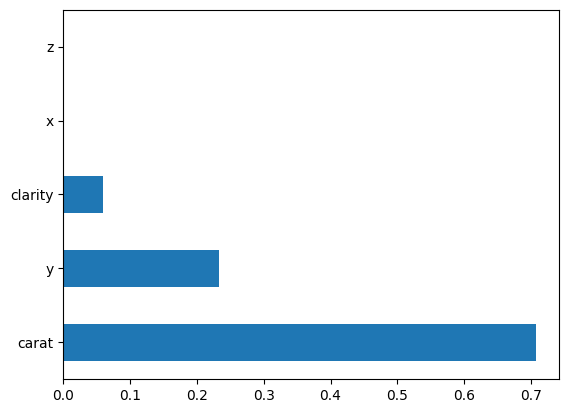

In [31]:
# Decision Trees (Multiple if-else statements!)
from sklearn.tree import DecisionTreeRegressor
RegModel = DecisionTreeRegressor(max_depth=5,criterion='friedman_mse')
# Good Range of Max_depth = 2 to 20

# Printing all the parameters of Decision Tree
print(RegModel)

# Creating the model on Training Data
DT=RegModel.fit(X_train,y_train)
prediction=DT.predict(X_test)

from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, DT.predict(X_train)))

# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(DT.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')

###########################################################################
print('\n##### Model Validation and Accuracy Calculations ##########')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)

# Printing sample prediction values
print(TestingDataResults.head())

# Calculating the error for each row
TestingDataResults['APE']=100 * ((abs(
  TestingDataResults['price']-TestingDataResults['Predictedprice']))/TestingDataResults['price'])

MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])

Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)

# Defining a custom function to calculate accuracy
# Make sure there are no zeros in the Target variable if you are using MAPE
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    #print('#'*70,'Accuracy:', 100-MAPE)
    return(100-MAPE)

# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

**Random Forest Regressor**

RandomForestRegressor(criterion='friedman_mse', max_depth=4, n_estimators=400)
R2 Value: 0.9215524603905356

##### Model Validation and Accuracy Calculations ##########
   carat     x     y     z  clarity  price  Predictedprice
0   0.71  5.86  5.82  3.49      3.0   2838          2461.0
1   0.33  4.44  4.43  2.77      3.0    780           697.0
2   1.29  7.05  6.99  4.30      1.0   5158          5481.0
3   1.01  6.40  6.43  3.99      2.0   4984          4852.0
4   1.00  6.27  6.23  4.06      2.0   3965          4598.0
Mean Accuracy on test data: 81.44981964543383
Median Accuracy on test data: 85.75967648757944

Accuracy values for 10-fold Cross Validation:
 [72.36494633 75.79247596 76.89953927 67.89264624 73.04371871 79.39093968
 74.65520728 64.1005445  72.96015776 76.24101696]

Final Average Accuracy of the model: 73.33


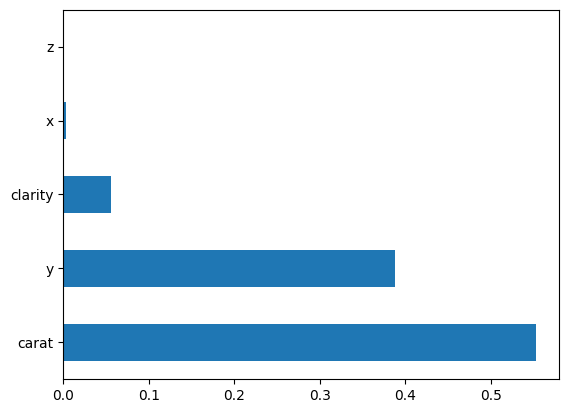

In [32]:
# Random Forest (Bagging of multiple Decision Trees)
from sklearn.ensemble import RandomForestRegressor
RegModel = RandomForestRegressor(max_depth=4, n_estimators=400,criterion='friedman_mse')
# Good range for max_depth: 2-10 and n_estimators: 100-1000

# Printing all the parameters of Random Forest
print(RegModel)

# Creating the model on Training Data
RF=RegModel.fit(X_train,y_train)
prediction=RF.predict(X_test)

from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, RF.predict(X_train)))

# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(RF.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')

###########################################################################
print('\n##### Model Validation and Accuracy Calculations ##########')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)

# Printing sample prediction values
print(TestingDataResults.head())

# Calculating the error for each row
TestingDataResults['APE']=100 * ((abs(
  TestingDataResults['price']-TestingDataResults['Predictedprice']))/TestingDataResults['price'])


MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])

Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)


# Defining a custom function to calculate accuracy
# Make sure there are no zeros in the Target variable if you are using MAPE
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    #print('#'*70,'Accuracy:', 100-MAPE)
    return(100-MAPE)

# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

**Support Vector Machine (SWM) Regressor**

In [33]:
# Support Vector Machines(SVM)
from sklearn import svm
RegModel = svm.SVR(C=50, kernel='rbf', gamma=0.01)

# Printing all the parameters
print(RegModel)

# Creating the model on Training Data
SVM=RegModel.fit(X_train,y_train)
prediction=SVM.predict(X_test)

from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, SVM.predict(X_train)))

# Plotting the feature importance for Top 10 most important columns
# The built in attribute SVM.coef_ works only for linear kernel
%matplotlib inline
#feature_importances = pd.Series(SVM.coef_[0], index=Predictors)
#feature_importances.nlargest(10).plot(kind='barh')

###########################################################################
print('\n##### Model Validation and Accuracy Calculations ##########')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)

# Printing sample prediction values
print(TestingDataResults.head())

# Calculating the error for each row
TestingDataResults['APE']=100 * ((abs(
  TestingDataResults['price']-TestingDataResults['Predictedprice']))/TestingDataResults['price'])

MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])

Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)

# Defining a custom function to calculate accuracy
# Make sure there are no zeros in the Target variable if you are using MAPE
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    #print('#'*70,'Accuracy:', 100-MAPE)
    return(100-MAPE)

# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

SVR(C=50, gamma=0.01)
R2 Value: 0.9006339635345215

##### Model Validation and Accuracy Calculations ##########
   carat     x     y     z  clarity  price  Predictedprice
0   0.71  5.86  5.82  3.49      3.0   2838          2747.0
1   0.33  4.44  4.43  2.77      3.0    780           545.0
2   1.29  7.05  6.99  4.30      1.0   5158          5745.0
3   1.01  6.40  6.43  3.99      2.0   4984          4246.0
4   1.00  6.27  6.23  4.06      2.0   3965          3904.0
Mean Accuracy on test data: 83.95443804998756
Median Accuracy on test data: 87.28473443463533

Accuracy values for 10-fold Cross Validation:
 [83.74499329 86.04708745 85.75043153 84.94438871 74.41026348 82.46370601
 81.65586592 83.21866449 84.33221713 81.78569622]

Final Average Accuracy of the model: 82.84


**K-Nearest Neighbor (KNN)**

In [34]:
#kNN
# K-Nearest Neighbor(KNN)
from sklearn.neighbors import KNeighborsRegressor
RegModel = KNeighborsRegressor(n_neighbors=3)

# Printing all the parameters of KNN
print(RegModel)

# Creating the model on Training Data
KNN=RegModel.fit(X_train,y_train)
prediction=KNN.predict(X_test)

from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, KNN.predict(X_train)))

# Plotting the feature importance for Top 10 most important columns
# The variable importance chart is not available for KNN

###########################################################################
print('\n##### Model Validation and Accuracy Calculations ##########')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)

# Printing sample prediction values
print(TestingDataResults.head())

# Calculating the error for each row
TestingDataResults['APE']=100 * ((abs(
  TestingDataResults['price']-TestingDataResults['Predictedprice']))/TestingDataResults['price'])

MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])

Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)

# Defining a custom function to calculate accuracy
# Make sure there are no zeros in the Target variable if you are using MAPE
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    #print('#'*70,'Accuracy:', 100-MAPE)
    return(100-MAPE)

# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

KNeighborsRegressor(n_neighbors=3)
R2 Value: 0.9623760903465909

##### Model Validation and Accuracy Calculations ##########
   carat     x     y     z  clarity  price  Predictedprice
0   0.71  5.86  5.82  3.49      3.0   2838          2620.0
1   0.33  4.44  4.43  2.77      3.0    780           698.0
2   1.29  7.05  6.99  4.30      1.0   5158          4486.0
3   1.01  6.40  6.43  3.99      2.0   4984          4266.0
4   1.00  6.27  6.23  4.06      2.0   3965          3807.0
Mean Accuracy on test data: 86.22811020886665
Median Accuracy on test data: 89.56600511241892

Accuracy values for 10-fold Cross Validation:
 [79.21628859 82.14759768 79.84394737 74.64637801 74.65964566 81.96387246
 83.60636574 79.5498825  78.86165998 80.30964355]

Final Average Accuracy of the model: 79.48


**14. Selection of Best Model:** Support Vector Machine (SVM) with an average accuracy of 82.84%


**15. Deployment Best Model in Production**

In [35]:
TargetVariable='price'
Predictors=['carat', 'x', 'y', 'z']

X=DataForML[Predictors].values
y=DataForML[TargetVariable].values

# Normalise dataset
from sklearn.preprocessing import Normalizer
PredictorScaler=Normalizer()
PredictorScalerFit=PredictorScaler.fit(X)

X=PredictorScalerFit.transform(X)

# Check for data loss
print(X.shape)
print(y.shape)

(53920, 4)
(53920,)


In [36]:
from sklearn import svm
RegModel= svm.SVR(C=50, kernel='rbf', gamma=0.01)

# Retrain model with 100% available data
Final_SVM_Model=RegModel.fit(X,y)

In [37]:
# save model as serialised file
from google.colab import drive
drive.mount('/content/drive')
import pickle
import os

with open('/content/drive/My Drive/Final_SVM_Model.pk1', 'wb') as fileWriteStream:
  pickle.dump(Final_SVM_Model, fileWriteStream)
  fileWriteStream.close()

print('pickle file of Predictive Model located:'),os.getcwd()


pickle file of Predictive Model located:


(None, '/content/drive/MyDrive/SoftwareTechCapstone')

**Python Function**

In [41]:
from re import IGNORECASE

def FunctionPredictResult(InputData):
  import pandas as pd
  Num_Inputs=InputData.shape[0]

  # Append new data w Training data
  DataForML=pd.read_pickle('DataForML.pkl')
  # Append input data
  InputData = pd.concat([InputData, DataForML], ignore_index=True)

  # In same order as model training
  Predictors=['carat', 'x', 'y', 'z']
  # Generating the input values to the model
  X=InputData[Predictors].values[0:Num_Inputs]

  # Generating the normalised values of X since it was done while model training
  X=PredictorScalerFit.transform(X)

    # Loading the Function from pickle file
  import pickle
  with open('Final_SVM_Model.pk1', 'rb') as fileReadStream:
    PredictionModel=pickle.load(fileReadStream)
    # Don't forget to close the filestream!
    fileReadStream.close()

    # Genrating Predictions
  Prediction=PredictionModel.predict(X)
  PredictionResult=pd.DataFrame(Prediction, columns=['Prediction'])
  return(PredictionResult)


In [42]:
# Create new data to test function with
NewSampleData=pd.DataFrame(data=[[0.5, 6.99, 30.54, 24.3],[3, 8.1, 47.9, 23.2]],columns=['carat', 'x', 'y', 'z'])

print(NewSampleData)

# Calling the Function for prediction
FunctionPredictResult(NewSampleData)

   carat     x      y     z
0    0.5  6.99  30.54  24.3
1    3.0  8.10  47.90  23.2


,Prediction
0,2315.867476
1,2375.174087


API Prediction Function

In [43]:
def FunctionGeneratePrediction(inp_carat , inp_x, inp_y, inp_z):

    # Creating a data frame for the model input
    SampleInputData=pd.DataFrame(
     data=[[inp_carat , inp_x, inp_y, inp_z]],
     columns=['carat', 'x', 'y', 'z'])

    # Calling the function defined above using the input parameters
    Predictions=FunctionPredictResult(InputData= SampleInputData)

    # Returning the predictions
    return(Predictions.to_json())

# Function call
FunctionGeneratePrediction( inp_carat=0.8,
                           inp_x=6.5,
                           inp_y=43.3,
                           inp_z=23.2
                             )

'{"Prediction":{"0":2319.6938472477}}'

In [44]:
from flask import Flask, request, jsonify
import pickle
import pandas as pd
import numpy

app = Flask(__name__)

@app.route('/prediction_api', methods=["GET"])
def prediction_api():
    try:
        # Getting the paramters from API call
        carat_value = float(request.args.get('carat'))
        x_value=float(request.args.get('x'))
        y_value=float(request.args.get('y'))
        z_value=float(request.args.get('z'))

        # Calling the funtion to get predictions
        prediction_from_api=FunctionGeneratePrediction(
                                                       inp_carat=carat_value,
                                                       inp_x=x_value,
                                                       inp_y=y_value,
                                                       inp_z=z_value,
                                                )

        return (prediction_from_api)

    except Exception as e:
        return('Something is not right!:'+str(e))

In [45]:
import os
if __name__ =="__main__":

    # Hosting the API in localhost
    app.run(host='127.0.0.1', port=9000, threaded=True, debug=True, use_reloader=False)
    # Interrupt kernel to stop the API

 * Serving Flask app '__main__'
 * Debug mode: on


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:9000
INFO:werkzeug:Press CTRL+C to quit
